In [ ]:
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
from statsmodels.stats.diagnostic import lilliefors


In [ ]:
def organize_data(de, ga, ra, cmaes):
  data = pd.DataFrame()
  data['de'] = de
  data['ga'] = ga
  data['cmaes'] = cmaes
  data['ra'] = ra
  return data

In [ ]:
def test_normal(data, alpha):
  for i in data.columns:
    # stat, p_value = shapiro(data[i])
    stat, p_value = lilliefors(data[i])
    print(stat, p_value)
    if p_value < alpha:
      print(f"Reject the null hypothesis. {i.upper()} does not follow normality.")
    else:
      print(f"Fail to reject the null hypothesis. {i.upper()} can be assumed to be normally distributed.")


In [ ]:
def dep_t_test(group1, group2, alpha):
  result = ttest_rel(group1, group2)

  print(result.statistic, result.pvalue)

  if result.pvalue < alpha:
      print(f"Reject the null hypothesis. Two groups are significantly different from each other.")
  else:
      print("Fail to reject the null hypothesis. No significant difference.")


In [ ]:
def my_wilcoxon(group1, group2, alpha):
  statistic, p_value = wilcoxon(group1, group2)

  # Output the results
  print(f"{statistic}, {p_value}")

  # Interpret the results
  if p_value < alpha:
      print("Reject the null hypothesis. There is a significant difference.")
  else:
      print("Fail to reject the null hypothesis. No significant difference.")

In [ ]:
alpha = 0.01

## N covered pixels

### regular

In [ ]:
de = [25885.638, 26255.454, 25848.894, 25831.81, 25970.908, 26060.954, 26052.066, 25803.476, 25775.968, 25989.384]
ga = [29214.748, 29914.578, 29536.782, 29081.882, 29665.518, 29684.012, 29208.436, 29274.738, 29426.074, 28992.26]
ra = [40000] * 10
cmaes = [8133.252, 8195.642, 8266.002, 8137.82, 8100.11, 8387.506, 8296.416, 7941.992, 8475.376, 8112.318]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

normality

In [ ]:
test_normal(data, alpha)

0.161560253110145 0.6444670853308635
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.16370580749449182 0.6241267530875014
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.16652806270530884 0.5973711466659684
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
nan nan
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/_lilliefors.py:279: RuntimeWarning: invalid value encountered in divide
  z = (x - x.mean()) / x.std(ddof=1)


random is the only one that is not normality distributed

t test

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

-43.33406501606094 9.266398022426898e-12
Reject the null hypothesis. Two groups are significantly different from each other.
273.9366626139717 5.8587682359759425e-19
Reject the null hypothesis. Two groups are significantly different from each other.
-230.40652855231463 2.780459857241616e-18
Reject the null hypothesis. Two groups are significantly different from each other.


wilcoxon

In [ ]:
# ra - de
my_wilcoxon(data['ra'], data['de'], alpha)

# ra - ga
my_wilcoxon(data['ra'], data['ga'], alpha)

# ra - cmaes
my_wilcoxon(data['ra'], data['cmaes'], alpha)


0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.
0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.
0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.


friedman

In [ ]:
# Your dat

# Perform Friedman test
statistic, p_value = friedmanchisquare(de, ga, ra, cmaes)

# Output the results
print(f"Friedman Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level (commonly 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")


Friedman Statistic: 30.0
P-value: 1.3800570312932553e-06
Reject the null hypothesis. There are significant differences between the groups.


In [ ]:
#jncor teste
# Your data
de = [25885.638, 26255.454, 25848.894, 25831.81, 25970.908, 26060.954, 26052.066, 25803.476, 25775.968, 25989.384]
ga = [29214.748, 29914.578, 29536.782, 29081.882, 29665.518, 29684.012, 29208.436, 29274.738, 29426.074, 28992.26]
ra = [40000] * 10
cmaes = [8133.252, 8195.642, 8266.002, 8137.82, 8100.11, 8387.506, 8296.416, 7941.992, 8475.376, 8112.318]
# Perform Friedman test
statistic, p_value = mannwhitneyu(cmaes, ga)

# Output the results
print(f"Mannwhitneyu Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level (commonly 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")


Mannwhitneyu Statistic: 0.0
P-value: 0.00018267179110955002
Reject the null hypothesis. There are significant differences between the groups.


### distilled

In [ ]:
de = [30377.638, 30551.246, 30370.606, 30493.576, 30503.304, 30358.312, 30314.14, 30558.584, 30441.45, 30401.314]
ga = [29505.046, 29854.448, 30006.61, 29702.484, 29534.274, 29612.854, 29282.192, 29465.776, 29540.546, 29094.768]
ra = [40000] * 10
cmaes =  [8587.454, 8604.668, 8719.936, 8433.4,  8549.056, 8970.62,  8512.974, 8331.708, 8673.076, 8671.548]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.1616972164138436 0.6431686427825398
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.15948733301602896 0.6641188283656119
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.15507753413016834 0.7059247015325694
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
nan nan
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/_lilliefors.py:279: RuntimeWarning: invalid value encountered in divide
  z = (x - x.mean()) / x.std(ddof=1)


ra is the only one which isnt normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

10.884126239815672 1.7602164057369678e-06
Reject the null hypothesis. Two groups are significantly different from each other.
297.8412207815724 2.759480694214544e-19
Reject the null hypothesis. Two groups are significantly different from each other.
-229.13013311335254 2.9229839036549388e-18
Reject the null hypothesis. Two groups are significantly different from each other.


In [ ]:
# ra - de
my_wilcoxon(data['ra'], data['de'], alpha)

# ra - ga
my_wilcoxon(data['ra'], data['ga'], alpha)

# ra - cmaes
my_wilcoxon(data['ra'], data['cmaes'], alpha)

0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.
0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.
0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.


friedman

In [ ]:
# Perform Friedman test
statistic, p_value = friedmanchisquare(de, ga, ra, cmaes)

# Output the results
print(f"Friedman Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")

Friedman Statistic: 30.0
P-value: 1.3800570312932553e-06
Reject the null hypothesis. There are significant differences between the groups.


## quantity of adv

### regular

In [ ]:
ra = [506.29, 506.65, 511.006, 509.986, 507.678, 508.952, 506.07, 507.552, 506.432, 511.726]
de = [881.008, 869.454, 888.1, 876.702, 895.272, 866.516, 892.172, 906.164, 876.848, 903.874]
ga = [4777.82, 4942.274, 5026.636, 5006.166, 4811.486, 5090.832, 4842.106, 4940.986, 4920.98, 5089.046]
cmaes = [959.712, 973.154, 994.114, 942.402, 952.02, 970.86, 988.498, 988.298, 1015.8, 986.82]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.1380386631669822 0.8439722745684254
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.12428346116526923 0.9311926800075371
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.170110582704879 0.5634080611383414
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.2060637628209066 0.26911118822980085
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normally distributed

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)


-113.99221005601001 1.5622989683310095e-15
Reject the null hypothesis. Two groups are significantly different from each other.
-12.286844882951906 6.294851298062337e-07
Reject the null hypothesis. Two groups are significantly different from each other.
-115.63412726730805 1.3737292360757565e-15
Reject the null hypothesis. Two groups are significantly different from each other.
-88.84413860009306 1.4695595028189068e-14
Reject the null hypothesis. Two groups are significantly different from each other.
-129.15675010153925 5.07993978205402e-16
Reject the null hypothesis. Two groups are significantly different from each other.
66.84221542768012 1.8959985310970643e-13
Reject the null hypothesis. Two groups are significantly different from each other.


friedman

In [ ]:
# Perform Friedman test
statistic, p_value = friedmanchisquare(ra, de, ga, cmaes)

# Output the results
print(f"Friedman Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level (commonly 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")

Friedman Statistic: 30.0
P-value: 1.3800570312932553e-06
Reject the null hypothesis. There are significant differences between the groups.


### distilled

In [ ]:
de = [806.688, 806.346, 817.372, 793.624, 867.748, 778.842, 820.826, 828.588, 819.344, 841.622]
ra = [276.4, 277.136, 278.38, 277.182, 276.32, 277.974, 277.872, 276.284, 274.978, 277.95]
ga = [1606.286, 1530.734, 1563.39, 1667.856, 1672.288, 1684.218, 1565.962, 1586.928, 1630.272, 1703.29]
cmaes = [492.642, 541.104, 537.718, 548.026, 500.146, 517.368, 515.008, 484.318, 514.13, 500.52]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.15627995237865322 0.6945255093945851
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.18502396202157523 0.4351081339780406
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.15798660381747687 0.6783460745862463
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.18328353159178568 0.4488395441937467
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normally distributed

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)


-41.410806964739265 1.3917052526261282e-11
Reject the null hypothesis. Two groups are significantly different from each other.
23.910159380407492 1.8701399994727178e-09
Reject the null hypothesis. Two groups are significantly different from each other.
-51.92698698433993 1.8298368776212566e-12
Reject the null hypothesis. Two groups are significantly different from each other.
-68.15802325099104 1.5913995218028816e-13
Reject the null hypothesis. Two groups are significantly different from each other.
-71.74453685021697 1.0038469322063875e-13
Reject the null hypothesis. Two groups are significantly different from each other.
35.606554235480374 5.3769147893456777e-11
Reject the null hypothesis. Two groups are significantly different from each other.


friedman

In [ ]:
# Perform Friedman test
statistic, p_value = friedmanchisquare(de, ra, ga, cmaes)

# Output the results
print(f"Friedman Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level (commonly 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")

Friedman Statistic: 30.0
P-value: 1.3800570312932553e-06
Reject the null hypothesis. There are significant differences between the groups.


## nevals

### regular

In [ ]:
ra = [
    2174.906403940887, 2141.390243902439, 2075.1831683168316, 2011.391304347826,
    2411.0247524752476, 2089.137931034483, 1921.7810945273632, 1589.7208121827412,
    2082.990049751244, 2370.5825242718447
]
de = [
    487.037037037037, 869.2307692307693, 871.6981132075472, 616.1137440758293,
    839.6039603960396, 573.6585365853658, 616.7487684729064, 641.5841584158416,
    529.4685990338164, 582.1596244131456
]
ga = [
    341.5730337078652, 513.3333333333334, 341.30434782608694, 227.27272727272728,
    262.0689655172414, 435.35911602209944, 413.6363636363636, 283.14606741573033,
    374.71264367816093, 547.8260869565217
]
cmaes = [145.66473988439307, 192.7710843373494, 171.09826589595374, 169.41176470588235, 181.8181818181818, 155.42857142857142, 231.57894736842104, 212.71676300578034, 259.64912280701753, 185.88235294117646]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.2585681263273098 0.05719438736170865
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.12125575791779908 0.9460227747642328
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.17540359915955128 0.5132290891938048
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.17984971223390683 0.475931223012169
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

5.048282337436278 0.0006919565278483106
Reject the null hypothesis. Two groups are significantly different from each other.
9.888039160613348 3.929485595510142e-06
Reject the null hypothesis. Two groups are significantly different from each other.
-5.391275830680534 0.0004379778458280462
Reject the null hypothesis. Two groups are significantly different from each other.
18.0147161388001 2.278318689758403e-08
Reject the null hypothesis. Two groups are significantly different from each other.
24.4970370241891 1.50799062313335e-09
Reject the null hypothesis. Two groups are significantly different from each other.
-24.56446726047603 1.4716294832131363e-09
Reject the null hypothesis. Two groups are significantly different from each other.


friedman

In [ ]:
# Perform Friedman test
statistic, p_value = friedmanchisquare(ra, de, ga, cmaes)

# Output the results
print(f"Friedman Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level (commonly 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")

Friedman Statistic: 30.0
P-value: 1.3800570312932553e-06
Reject the null hypothesis. There are significant differences between the groups.


### distilled

In [ ]:
de = [
    318.3673469387755, 548.2517482517483, 600.0, 273.23943661971833, 696.5034965034965,
    500.6993006993007, 405.47945205479454, 348.93617021276594, 416.43835616438355, 339.3103448275862
]
ra = [
    1857.1390728476822, 2207.809210526316, 1750.3311258278145, 2538.3618421052633,
    1739.6190476190477, 2917.143790849673, 2459.0065359477126, 2093.04, 2477.0866666666666,
    1894.3355704697988
]
ga = [
    194.59459459459458, 187.82608695652175, 235.71428571428572, 224.13793103448276,
    410.81081081081084, 136.93693693693695, 323.4782608695652, 156.52173913043478,
    314.01869158878503, 303.57142857142856
]
cmaes = [153.57142857142858, 206.77966101694915, 170.43478260869566, 196.42857142857142, 184.34782608695653, 157.26495726495727, 229.05982905982907, 158.6206896551724, 235.71428571428572, 192.98245614035088]


In [ ]:
data = organize_data(de, ga, ra, cmaes)
test_normal(data, alpha)

0.18167843544578677 0.4615032124674766
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.15985622268391264 0.6606216723575241
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.14629447427110903 0.7813542795925916
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.1751304767308008 0.515818350498216
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

4.5657534744577895 0.0013550860781457394
Reject the null hypothesis. Two groups are significantly different from each other.
5.737477235488143 0.0002806925510444225
Reject the null hypothesis. Two groups are significantly different from each other.
-2.5619112013219274 0.030591058654893713
Fail to reject the null hypothesis. No significant difference.
12.202467654904062 6.676242681330115e-07
Reject the null hypothesis. Two groups are significantly different from each other.
14.175815304885695 1.8410881021933968e-07
Reject the null hypothesis. Two groups are significantly different from each other.
-16.30417212114119 5.4577321945762683e-08
Reject the null hypothesis. Two groups are significantly different from each other.


GA e CMAES are not different

friedman

In [ ]:

# Perform the Friedman test
stat, p_value = friedmanchisquare(de, ra, ga, cmaes)

# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 27.47999999999999
P-value: 4.669409820165777e-06
Reject the null hypothesis: There is a significant difference between groups.


### regular

In [ ]:
ra = [
    24643.012, 24477.97, 24678.374, 24272.716, 24814.054,
    24608.19, 24692.556, 24866.35, 24757.362, 24496.68
]
de = [
    22930.4, 23721.6, 23409.6, 23380.0, 24179.2,
    23835.2, 24010.4, 24099.2, 23659.2, 23208.0
]
ga = [
    25881.6, 25784.8, 25405.6, 26000.0, 26171.2,
    25677.6, 26065.6, 25860.8, 26210.4, 25481.6
]
cmaes = [26210.4, 26784.0, 26219.2, 26457.6, 25984.0, 26054.4, 26399.2, 26233.6, 26408.8, 26463.2]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.11681924128848031 0.9593116958199684
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.1137783990889435 0.9671238556488083
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.17007193790730268 0.5637744224051144
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.14929081546094325 0.7586278781276725
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

-18.302621932324165 1.982161819702383e-08
Reject the null hypothesis. Two groups are significantly different from each other.
-16.4775078999736 4.9761775536397256e-08
Reject the null hypothesis. Two groups are significantly different from each other.
4.011745542917517 0.0030558257409851546
Reject the null hypothesis. Two groups are significantly different from each other.
9.004004703888217 8.507034066341836e-06
Reject the null hypothesis. Two groups are significantly different from each other.
-13.551159001963232 2.7167253411987886e-07
Reject the null hypothesis. Two groups are significantly different from each other.
14.803449790200228 1.2649596616477147e-07
Reject the null hypothesis. Two groups are significantly different from each other.


friedman

In [ ]:

# Perform the Friedman test
stat, p_value = friedmanchisquare(ra, de, ga, cmaes)

# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 28.919999999999987
P-value: 2.3278065917953752e-06
Reject the null hypothesis: There is a significant difference between groups.


### distilled

In [ ]:
de = [
    28240.234, 28560.392, 28640.426, 28640.194, 28560.498,
    28560.358, 28320.296, 28720.246, 28320.304, 28400.246
]
ra = [
    28480.856, 28511.174, 28448.6, 28611.662, 28751.448,
    28652.646, 28512.456, 28627.912, 28743.126, 28644.512
]
ga = [
    31120.108, 30800.108, 31040.132, 30720.13, 31120.228,
    31120.076, 30800.186, 30800.09, 31440.168, 31040.17
]
cmaes = [31074.4, 30608.830, 30839.2, 31084.0, 30842.4, 30676.8, 30693.6, 30756.8, 31092.8, 30924.0]

In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.25231411474710563 0.07021574363777447
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.2175127348283566 0.2083384443850892
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.18455233636716595 0.4388291016295472
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.19066102219061393 0.39063362682922687
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

-23.917747058359456 1.8648822374212594e-09
Reject the null hypothesis. Two groups are significantly different from each other.
-26.381824787645204 7.803663659233902e-10
Reject the null hypothesis. Two groups are significantly different from each other.
-2.0281141460341576 0.07315698875559234
Fail to reject the null hypothesis. No significant difference.
1.705890844717506 0.12221642695296084
Fail to reject the null hypothesis. No significant difference.
-38.54012748707615 2.6480085410643733e-11
Reject the null hypothesis. Two groups are significantly different from each other.
38.168357058388686 2.8879989972342675e-11
Reject the null hypothesis. Two groups are significantly different from each other.


GA e CMAES no significant difference

DE e Random no significant difference

friedman

In [ ]:

# Perform the Friedman test
stat, p_value = friedmanchisquare(de, ra, ga, cmaes)


# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 26.039999999999992
P-value: 9.355244364196578e-06
Reject the null hypothesis: There is a significant difference between groups.


## success rate

### regular

In [ ]:
de = [0.432, 0.416, 0.424, 0.422, 0.404, 0.41, 0.406, 0.404, 0.414, 0.426]
ga = [0.356, 0.36, 0.368, 0.352, 0.348, 0.362, 0.352, 0.356, 0.348, 0.368]
ra = [0.406, 0.410, 0.404, 0.414, 0.404, 0.406, 0.402, 0.394, 0.402, 0.412]
cmaes = [0.346, 0.332, 0.346, 0.34, 0.352, 0.35, 0.342, 0.346, 0.342, 0.34 ]


In [ ]:
data = organize_data(de, ga, ra, cmaes)
test_normal(data, alpha)

0.13868134543708277 0.8390977111060784
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.1539020688693341 0.717068373359456
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.1645302749085841 0.616310618829237
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.1767703686985713 0.5002718103074729
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

20.32020738145844 7.892287705109122e-09
Reject the null hypothesis. Two groups are significantly different from each other.
17.83093549916209 2.492875954983957e-08
Reject the null hypothesis. Two groups are significantly different from each other.
-4.245952478513998 0.0021552901280036734
Reject the null hypothesis. Two groups are significantly different from each other.
-4.145653226931323 0.002500504601917982
Reject the null hypothesis. Two groups are significantly different from each other.
19.026369786502826 1.409383915149037e-08
Reject the null hypothesis. Two groups are significantly different from each other.
-19.996847122354314 9.09215523859193e-09
Reject the null hypothesis. Two groups are significantly different from each other.


friedman

In [ ]:
# Perform the Friedman test
stat, p_value = friedmanchisquare(de, ga, ra, cmaes)

# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 28.63636363636363
P-value: 2.670131916695606e-06
Reject the null hypothesis: There is a significant difference between groups.


In [ ]:
#jncor teste
# Your data
regular_de = [0.432, 0.416, 0.424, 0.422, 0.404, 0.41, 0.406, 0.404, 0.414, 0.426]
regular_ga = [0.356, 0.36, 0.368, 0.352, 0.348, 0.362, 0.352, 0.356, 0.348, 0.368]
regular_ra = [0.406, 0.410, 0.404, 0.414, 0.404, 0.406, 0.402, 0.394, 0.402, 0.412]
regular_cmaes = cmaes = [0.346, 0.332, 0.346, 0.34, 0.352, 0.35,  0.342, 0.346, 0.342, 0.34 ]


# Perform Friedman test
statistic, p_value = mannwhitneyu(regular_ga, regular_cmaes)

# Output the results
print(f"Mannwhitneyu Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level (commonly 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the groups.")

Mannwhitneyu Statistic: 95.0
P-value: 0.0007236846434948959
Reject the null hypothesis. There are significant differences between the groups.


### distilled

In [ ]:
de = [0.294, 0.286, 0.284, 0.284, 0.286, 0.286, 0.292, 0.282, 0.292, 0.29]
ga = [0.222, 0.23, 0.224, 0.232, 0.222, 0.222, 0.23, 0.23, 0.214, 0.224]
ra = [0.302, 0.304, 0.302, 0.304, 0.294, 0.306, 0.306, 0.3, 0.3, 0.298]
cmaes = [0.224, 0.236, 0.23, 0.224, 0.23, 0.234, 0.234, 0.232, 0.224, 0.228]


In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.25224803755523917 0.07035332167804205
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.21758053730043103 0.20802550970601658
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.19323782298190972 0.37030353600582216
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.14250047571205704 0.8101306868665278
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

23.92017060918971 1.8632063335016894e-09
Reject the null hypothesis. Two groups are significantly different from each other.
25.996222253023035 8.895534001883557e-10
Reject the null hypothesis. Two groups are significantly different from each other.
2.6440857450757473 0.026734119873261405
Fail to reject the null hypothesis. No significant difference.
8.17423891369599 1.862685436810214e-05
Reject the null hypothesis. Two groups are significantly different from each other.
45.38277144289172 6.124981154300095e-12
Reject the null hypothesis. Two groups are significantly different from each other.
-46.475800154488965 4.9481330524404344e-12
Reject the null hypothesis. Two groups are significantly different from each other.


CMAES e GA no significant difference

friedman

In [ ]:
# Perform the Friedman test
stat, p_value = friedmanchisquare(de, ga, ra, cmaes)

# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 28.919999999999987
P-value: 2.3278065917953752e-06
Reject the null hypothesis: There is a significant difference between groups.


## distortion

### distilled mean

In [ ]:
cmaes =  [311.8516527176374, 320.86941093343114, 311.83420904499707, 321.33985218361516, 313.1907347821907, 329.5185712707888, 325.2266720127637, 326.62976095051766, 315.82344325678275, 321.3699690490159]
de = [330.619769319216, 316.17251397037205, 327.68176325672135, 330.33934817428127, 312.36857051368736, 328.33740191832317, 325.3772732636905, 314.5008166346956, 329.3659575523816, 319.07190651447405]
ga = [265.5408694602011, 270.11844131337733, 267.6425037441467, 270.3729678762081, 267.460340803417, 279.6722590787285, 266.3158932054577, 269.0237762133714, 264.4587306157329, 272.7763934186442]
ra = [393.9369798175462, 392.2953603836307, 391.92304199761395, 396.04618348607625, 388.7686376500662, 394.718497800003, 394.03327155951376, 392.7029655839236, 394.7310354763253, 392.8350897344792]


In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.22739272957450418 0.16273844057209796
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.20701654071382736 0.2615940913851238
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.16903544218277433 0.5736006321528339
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.1630260514905784 0.6305709910266056
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

20.17834443783897 8.3955954676673e-09
Reject the null hypothesis. Two groups are significantly different from each other.
1.135710324100783 0.28541561349080546
Fail to reject the null hypothesis. No significant difference.
33.301678247637916 9.779458626860989e-11
Reject the null hypothesis. Two groups are significantly different from each other.
38.74752317952281 2.5238087206349696e-11
Reject the null hypothesis. Two groups are significantly different from each other.
87.20895500297388 1.7366802688541812e-14
Reject the null hypothesis. Two groups are significantly different from each other.
-39.78533701841394 1.9920022682358206e-11
Reject the null hypothesis. Two groups are significantly different from each other.


DE e CMAES no significant difference

friedman

In [ ]:

# Perform the Friedman test
stat, p_value = friedmanchisquare(cmaes, de, ga, ra)

# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 27.0
P-value: 5.887355583577668e-06
Reject the null hypothesis: There is a significant difference between groups.


### distilled min

In [ ]:
cmaes = [222.82142857142858, 239.33898305084745, 221.10434782608695, 228.83928571428572, 221.73043478260868, 237.87179487179486, 240.82905982905982, 235.91379310344828, 226.50892857142858, 235.53508771929825]
de = [241.47619047619048, 225.44755244755245, 241.21830985915494, 241.83802816901408, 228.17482517482517, 241.5874125874126, 239.65753424657535, 228.12056737588654, 242.3972602739726, 232.7448275862069]
ga = [182.2882882882883, 185.90434782608696, 182.875, 188.2844827586207, 185.26126126126127, 187.15315315315314, 185.66086956521738, 184.3217391304348, 180.2710280373832, 186.09821428571428]
ra = [239.33112582781456, 241.80263157894737, 240.01324503311258, 242.6315789473684, 232.0408163265306, 246.22222222222223, 242.2941176470588, 238.68666666666667, 243.78, 239.73154362416108]


In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.2899177458966309 0.01900191115773294
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.17395415080713517 0.5269701815999583
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.21990333612420843 0.19730489315281843
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.20224767354891107 0.29921884798834825
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

21.056023228380976 5.764666106708433e-09
Reject the null hypothesis. Two groups are significantly different from each other.
1.4169495832661898 0.1901699661762649
Fail to reject the null hypothesis. No significant difference.
21.53423045204096 4.726620395552647e-09
Reject the null hypothesis. Two groups are significantly different from each other.
2.454837269426302 0.03646619480981851
Fail to reject the null hypothesis. No significant difference.
41.3206138343034 1.41915257057128e-11
Reject the null hypothesis. Two groups are significantly different from each other.
-4.522948749752255 0.00144068756181095
Reject the null hypothesis. Two groups are significantly different from each other.


DE e CMAES no significant difference

Random e DE no significant difference

In [ ]:
# Perform the Friedman test
stat, p_value = friedmanchisquare(cmaes, de, ga, ra)

# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 24.23999999999998
P-value: 2.2257545964009998e-05
Reject the null hypothesis: There is a significant difference between groups.


## regular mean

In [ ]:
# Your data
cmaes = [472.4796883729532, 465.90653199513525, 473.3865180852525, 466.44099215542656, 477.67731667240173, 468.6165774113876, 463.4224334191677, 469.99399607665424, 466.9858723099051, 462.47914677054797]

de = [497.6590961600567, 494.4605233256568, 495.5691868645849, 500.6978422277905, 492.87714019150525, 495.0988887835984, 492.99333136150875, 486.31663704015773, 493.3337762159178, 493.8623342743568]

ga = [468.7780341275983, 465.4368237941605, 469.0599388554492, 474.7486593566105, 468.4321587334721, 476.35591736835585, 467.57039310063846, 480.64239820845114, 465.8054038479359, 469.1238544172465]

ra = [384.48578682071025, 388.36453625075745, 381.28273140128823, 385.57494820131404, 383.69544840461293, 382.96419841693967, 381.8583398032298, 378.75228301066477, 384.4349629599748, 383.06001511589517]


In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.251523526345633 0.07186181242279009
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.31634373092740875 0.005820382982822264
Reject the null hypothesis. GA does not follow normality.
0.14469494917541237 0.7934862255810345
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.14433260370349843 0.7962345136236814
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal but ga are normal

In [ ]:
# # de - ga
# dep_t_test(data['de'], data['ga'], alpha)

# # de - cmaes
# dep_t_test(data['de'], data['cmaes'], alpha)

# # ga - cmaes
# dep_t_test(data['cmaes'], data['ga'], alpha)

# # ra - de
# dep_t_test(data['ra'], data['de'], alpha)

# # ra - ga
# dep_t_test(data['ra'], data['ga'], alpha)

# # ra - cmaes
# dep_t_test(data['cmaes'], data['ra'], alpha)

10.752915161151966 1.9493574805408172e-06
Reject the null hypothesis. Two groups are significantly different from each other.
16.177916070535073 5.840982588810296e-08
Reject the null hypothesis. Two groups are significantly different from each other.
-0.7466205331318347 0.4743438952733724
Fail to reject the null hypothesis. No significant difference.
-119.68853376155414 1.007585844960905e-15
Reject the null hypothesis. Two groups are significantly different from each other.
-40.68605613230768 1.6301469899213338e-11
Reject the null hypothesis. Two groups are significantly different from each other.
59.09142782845931 5.735575479540067e-13
Reject the null hypothesis. Two groups are significantly different from each other.


In [ ]:
# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# de - ra
dep_t_test(data['ra'], data['de'], alpha)

# ra - cmaes
dep_t_test(data['ra'], data['cmaes'], alpha)

# ga - de
my_wilcoxon(data['ga'], data['de'], alpha)

# ga - ra
my_wilcoxon(data['ga'], data['ra'], alpha)

# ga - cmaes
my_wilcoxon(data['ga'], data['cmaes'], alpha)

13.138926156072877 3.5441219825763655e-07
Reject the null hypothesis. Two groups are significantly different from each other.
-119.68853376155414 1.007585844960905e-15
Reject the null hypothesis. Two groups are significantly different from each other.
-46.69304917451383 4.7454956124912e-12
Reject the null hypothesis. Two groups are significantly different from each other.
0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.
0.0, 0.001953125
Reject the null hypothesis. There is a significant difference.
20.0, 0.4921875
Fail to reject the null hypothesis. No significant difference.


CMAES e GA no significant difference

friedman

In [ ]:
# Perform the Friedman test
stat, p_value = friedmanchisquare(cmaes, de, ga, ra)


# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 27.0
P-value: 5.887355583577668e-06
Reject the null hypothesis: There is a significant difference between groups.


### regular min

In [ ]:
cmaes = [213.4971098265896, 201.43373493975903, 216.38728323699422, 214.28823529411764, 219.9090909090909, 218.21714285714285, 210.85380116959064, 215.84971098265896, 216.64327485380116, 205.35294117647058]

de = [253.4212962962963, 242.125, 250.25, 249.44075829383885, 234.4009900990099, 240.50731707317073, 237.30541871921181, 230.67821782178217, 238.59420289855072, 248.66666666666666]

ga = [193.9438202247191, 194.23333333333332, 197.2445652173913, 188.95454545454547, 189.93103448275863, 198.15469613259668, 187.07386363636363, 195.75842696629215, 190.51149425287358, 194.15217391304347]

ra = [219.07389162561577, 223.58536585365854, 215.73267326732673, 222.56521739130434, 216.5148514851485, 217.935960591133, 215.08955223880596, 211.14720812182742, 218.6318407960199, 222.55825242718447]


In [ ]:
data = organize_data(de, ga, ra, cmaes)

In [ ]:
test_normal(data, alpha)

0.19054422811448557 0.39155509277387646
Fail to reject the null hypothesis. DE can be assumed to be normally distributed.
0.20118242553010868 0.30762329626578533
Fail to reject the null hypothesis. GA can be assumed to be normally distributed.
0.2173643193563301 0.2090234392929006
Fail to reject the null hypothesis. CMAES can be assumed to be normally distributed.
0.16395875768186285 0.6217287291130525
Fail to reject the null hypothesis. RA can be assumed to be normally distributed.


all normal

In [ ]:
# de - ga
dep_t_test(data['de'], data['ga'], alpha)

# de - cmaes
dep_t_test(data['de'], data['cmaes'], alpha)

# ga - cmaes
dep_t_test(data['cmaes'], data['ga'], alpha)

# ra - de
dep_t_test(data['ra'], data['de'], alpha)

# ra - ga
dep_t_test(data['ra'], data['ga'], alpha)

# ra - cmaes
dep_t_test(data['cmaes'], data['ra'], alpha)

20.00920124361033 9.042762035681402e-09
Reject the null hypothesis. Two groups are significantly different from each other.
8.642802549481132 1.1876831869452638e-05
Reject the null hypothesis. Two groups are significantly different from each other.
9.356191896150962 6.208524561893677e-06
Reject the null hypothesis. Two groups are significantly different from each other.
-12.508124970641898 5.404190463443785e-07
Reject the null hypothesis. Two groups are significantly different from each other.
14.155196483681998 1.8644112403484656e-07
Reject the null hypothesis. Two groups are significantly different from each other.
-1.8225397287094316 0.10169270326390889
Fail to reject the null hypothesis. No significant difference.


CMAES e random no significant difference

friedman

In [ ]:
# Your data

# Perform the Friedman test
stat, p_value = friedmanchisquare(cmaes, de, ga, ra)
# Output the results
print(f"Friedman Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

Friedman Test Statistic: 27.120000000000005
P-value: 5.55598717156124e-06
Reject the null hypothesis: There is a significant difference between groups.


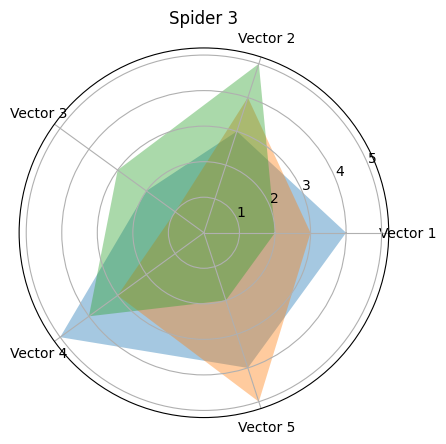

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spider_chart(ax, data, labels, title):
    num_vars = len(data)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Make plot circular
    data += data[:1]
    angles += angles[:1]

    # Plot
    ax.fill(angles, data, alpha=0.4)

    # Set labels for each point
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    ax.set_title(title)

# Example data for 3 sets of 5 vectors each
data_set1 = [4, 3, 2, 5, 4]
data_set2 = [3, 4, 1, 3, 5]
data_set3 = [2, 5, 3, 4, 2]

labels = ['Vector 1', 'Vector 2', 'Vector 3', 'Vector 4', 'Vector 5']
title = 'Spider Graph with 3 Sets of 5 Vectors'

# Create a single subplot for all spider graphs
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# Plot each spider graph
plot_spider_chart(ax, data_set1, labels, 'Spider 1')
plot_spider_chart(ax, data_set2, labels, 'Spider 2')
plot_spider_chart(ax, data_set3, labels, 'Spider 3')

plt.show()
